# An exploration of factors for shared bike's usage change
## by Fanlaizhangkou24/7

## Investigation Overview

The gole of this investigation is to find out patterns of shared bike users' behavior and think of possible solutions for a better bike distribution.

## Dataset Overview

This dataset includes ids of bike rides, the start - end time information, the member and rideable bike types.I will focus on the bike usage(the bike ride count). I will conbine four variables in multiple charts — starting hour, starting day of week, user type(member/casual) and rideable bike type(electric/docked) to find out how the amount of bike
My main interests in this dataset is how the start time('started_at) relate to the bike usage to find the factors for the shared bikes' usage change.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore");

In [2]:
# load in the dataset into a pandas dataframe
bkdf = pd.read_csv('baywheels.csv')
bkdf.info()

# fix date format
bkdf['started_at'] = pd.to_datetime(bkdf['started_at'])
bkdf['ended_at'] = pd.to_datetime(bkdf['ended_at'])

# add new column duration in minutes
bkdf['duration_minute']=(bkdf.ended_at-bkdf.started_at).astype('timedelta64[m]')

# drop uninterested column
bkdf.drop(['start_station_name','end_station_name',
           'start_station_id', 'end_station_id',
           'start_lng','start_lat','end_lng','end_lat'], axis=1,inplace=True)

# add new column 'start day of week'
bkdf['start_dow'] = bkdf.started_at.dt.dayofweek

# add new column 'start hour'
bkdf['start_hour'] = bkdf.started_at.dt.hour

# add new column 'start hour'
bkdf['type_comb'] = bkdf.member_casual+'__'+bkdf.rideable_type;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84259 entries, 0 to 84258
Data columns (total 13 columns):
ride_id               84259 non-null object
rideable_type         84259 non-null object
started_at            84259 non-null object
ended_at              84259 non-null object
start_station_name    53434 non-null object
start_station_id      53434 non-null float64
end_station_name      51858 non-null object
end_station_id        51858 non-null float64
start_lat             84259 non-null float64
start_lng             84259 non-null float64
end_lat               84117 non-null float64
end_lng               84117 non-null float64
member_casual         84259 non-null object
dtypes: float64(6), object(7)
memory usage: 8.4+ MB


Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What is the bike usage influenced by starting hour OR day?

The amount of electric bike rides starting on any day of the week or any hour during the day were always about twice as much as the docked bikes no matter how the total ride counts were. Both types of the bike get hired most frequently between 16:00-18：00 and least frequently between 2:00 - 5:00. Monday is the day people prefer either bikes less.

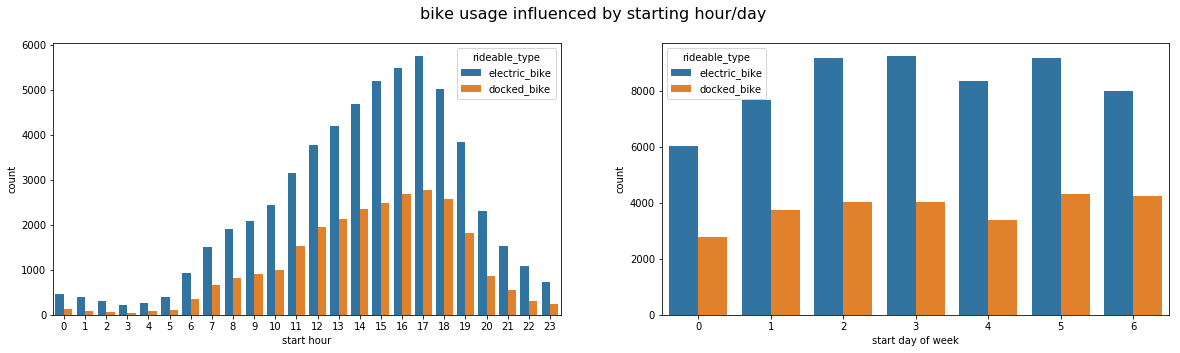

In [3]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
fig.suptitle('bike usage influenced by starting hour/day', fontsize=16)
a = sb.countplot(x=bkdf['start_hour'],hue=bkdf['rideable_type'],ax=ax[0])
b = sb.countplot(x=bkdf['start_dow'],hue=bkdf['rideable_type'], ax=ax[1]);
a.set(xlabel="start hour",ylabel="count")
b.set(xlabel="start day of week",ylabel="count");

## How is users' activeness influenced by starting hour OR day?

The ratio of bikes used by different types of user differ very much during different hours and days. Casual users normally outnumber member users. However, this situation gets altered between 6:00 - 10:00, which is the moring rush hour. Both bypes of user prefer Monday the least as a bike riding day, especially for casual users. On weekends, casual users tend to get more active than they are during the weekdays while the member user behave slightly less active.


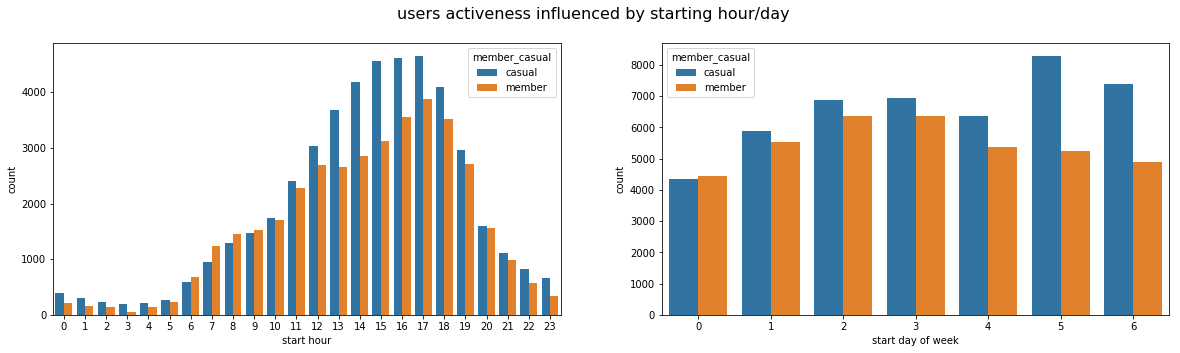

In [4]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
fig.suptitle('users activeness influenced by starting hour/day', fontsize=16)
one = sb.countplot(x=bkdf['start_hour'],hue=bkdf['member_casual'],ax=ax[0])
two = sb.countplot(x=bkdf['start_dow'],hue=bkdf['member_casual'], ax=ax[1]);
one.set(xlabel="start hour",ylabel="count")
two.set(xlabel="start day of week",ylabel="count");

## What is the bike usage influenced by starting hour AND day?

In this chart takes a closer look at when both types of bike get used the most frequently. It shows that although on average the busiest hours are 16:00 - 18:00,  on weekends this actually 14:00 - 17:00. More bikes were hired between 5:00 - 9:00 on weekdays than there were on weekends. 

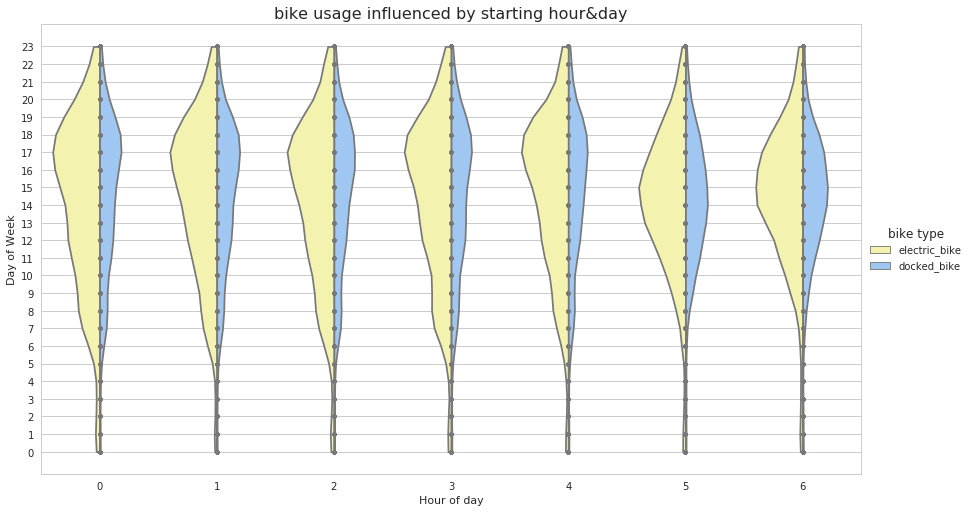

In [5]:
sb.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=[14.70, 8.27])
npArange = np.arange(0,23+1,1)
plt.yticks(npArange)
plt.title('bike usage influenced by starting hour&day', fontsize=16)


sb.violinplot(y="start_hour",x="start_dow", hue="rideable_type",
              gridsize = 24, 
              scale = 'count',cut = 0, split=True, inner="point",
               palette={"electric_bike": "y", "docked_bike": "b"},
               data=bkdf)
plt.ylabel('Day of Week')
plt.xlabel('Hour of day')
plt.legend(loc ='center left' , bbox_to_anchor=(1,0.5), title = 'bike type');


## How is users activeness influenced by starting hour AND day?

In this chart, we could see that the amount of bike hired by member users has a increases at 12:00 on weekday and dorps back afterwards. This might indicate that more member users ride bikes for work purposes than casual users do.From this and the previous feature, we are able to conclude that Friday 22:00 - Saturday 6：00 might be the best time for docket bike reparations since they are popular on weekends and Saturday 22:00 - Sunday 6:00 or Sunday 10：00 - Monday 3:00 might be the best time for electric bike reparations.

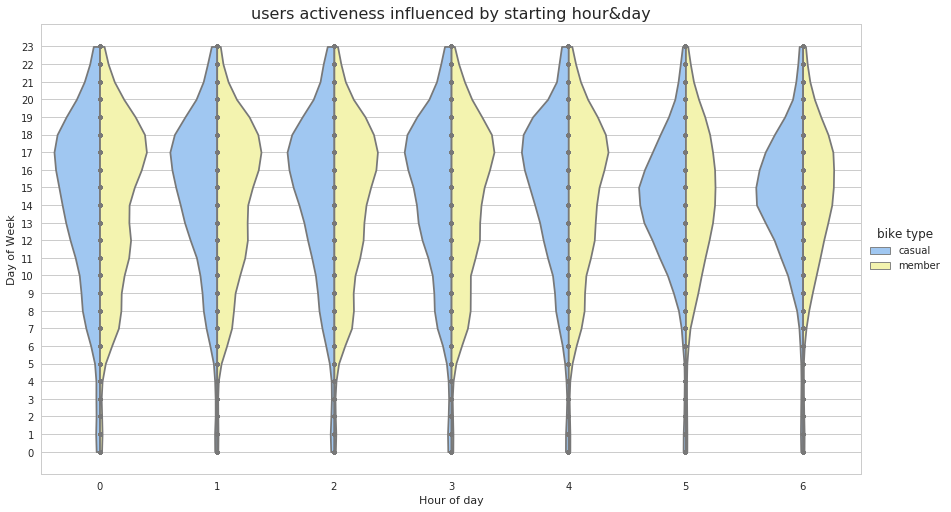

In [6]:
sb.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=[14.70, 8.27])

plt.title('users activeness influenced by starting hour&day', fontsize=16)
npArange = np.arange(0,23+1,1)
plt.yticks(npArange)
sb.violinplot(y="start_hour",x="start_dow", hue="member_casual",
              gridsize = 24, 
              scale = 'count',cut = 0, split=True, inner="point",
               palette={"member": "y", "casual": "b"},
               data=bkdf)

plt.ylabel('Day of Week')
plt.xlabel('Hour of day')
plt.legend(loc ='center left' , bbox_to_anchor=(1,0.5), title = 'bike type');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!